In [20]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

from statsmodels.graphics.gofplots import ProbPlot

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [3]:
auto = pd.read_csv('E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\Auto.csv', na_values=['?'])

In [4]:
auto.dropna(inplace=True)
auto.reset_index(drop=True, inplace=True)

In [5]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


#### using scikit learn

In [6]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [8]:
# create a Python list of feature names
feature_cols = ['cylinders', 
                'displacement', 
                'horsepower',
                'weight', 
                'acceleration', 
                'origin']

# use the list to select a subset of the original DataFrame
X = auto[feature_cols]

# select a Series from the DataFrame
y = auto['mpg']

In [10]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [11]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(274, 6)
(274,)
(118, 6)
(118,)


In [12]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
# Making predictions
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [14]:
residual = y_test - y_pred

### check normality 

#### thru visual plots (histograms)

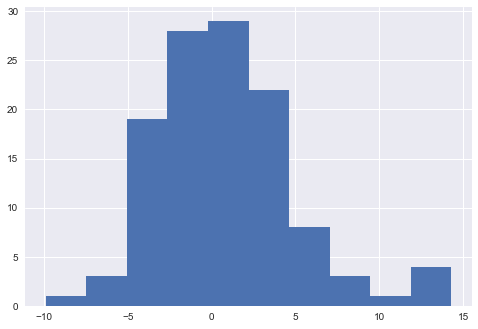

In [19]:
# histogram plot
plt.hist(residual);

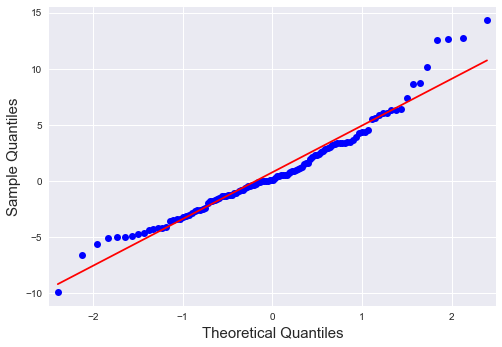

In [21]:
# q-q plot
qqplot(residual, line='s');

#### Statistical Normality Tests

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

- $H_0 :$ sample drawn from a Gaussian distribution
- $H_A :$ sample NOT drawn from a Gaussian distribution

Each test will return at least two things:

- Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.

- p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

In the SciPy implementation of these tests, you can interpret the p value as follows.


- p <= alpha: reject H0, not normal.
- p > alpha: fail to reject H0, normal.

#### 1. Shapiro-Wilk Test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In [24]:
# normality test
stat, p = shapiro(residual)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.957, p=0.001
Sample does not look Gaussian (reject H0)


#### 2. D’Agostino’s K^2 Test
The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

The D’Agostino’s K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value.

In [25]:
# normality test
stat, p = normaltest(residual)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=15.958, p=0.000
Sample does not look Gaussian (reject H0)


In [27]:
# normality test
result  = anderson(residual)
p = 0
print('{:15s}  {:15s}  {:15s}'.format('Significance Level', 'Test Statistic', 'Critical Value'))
print('{:15s}  {:15s}  {:15s}'.format('------------------', '--------------', '--------------'))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]    
    
    if result.statistic < result.critical_values[i]:
        print('{:17d}%  {:14.3f} {:16.3f} Test stats < CV,  (fail to reject H0)'.format(int(sl), result.statistic, cv))
    else:
        print('{:17d}%  {:14.3f} {:16.3f} Test stats >= CV, (reject H0)'.format(int(sl), result.statistic, cv))

Significance Level  Test Statistic   Critical Value 
------------------  --------------   -------------- 
               15%           1.318            0.558 Test stats >= CV, (reject H0)
               10%           1.318            0.636 Test stats >= CV, (reject H0)
                5%           1.318            0.763 Test stats >= CV, (reject H0)
                2%           1.318            0.889 Test stats >= CV, (reject H0)
                1%           1.318            1.058 Test stats >= CV, (reject H0)


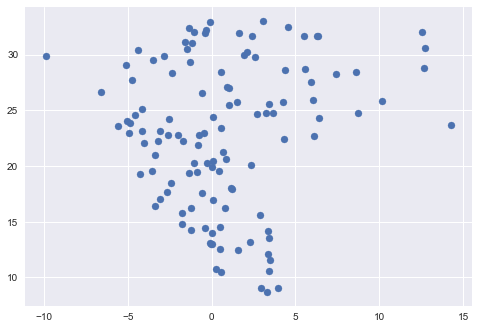

In [16]:
plt.scatter(residual, y_pred)

# Using statsmodel

In [28]:
model_f = 'mpg ~ cylinders + \
                 displacement + \
                 horsepower + \
                 weight + \
                 acceleration + \
                 origin'

model = smf.ols(formula=model_f, data=auto)
model_fit = model.fit()

In [29]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

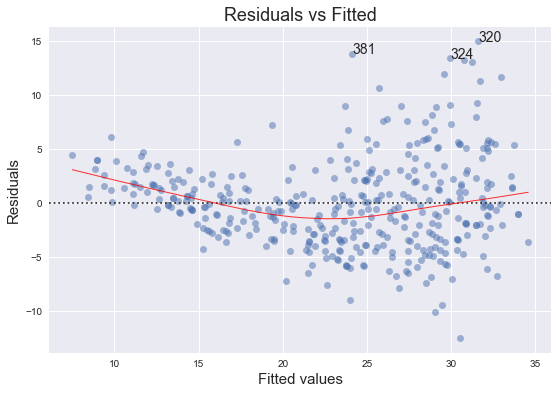

In [30]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(6)
plot_lm_1.set_figwidth(9)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=auto, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));